In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
df.duplicated().sum()

3

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(147, 5)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


<ipython-input-49-b6c78a0861a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "species",data=df,palette="Dark2")


<Axes: xlabel='species', ylabel='count'>

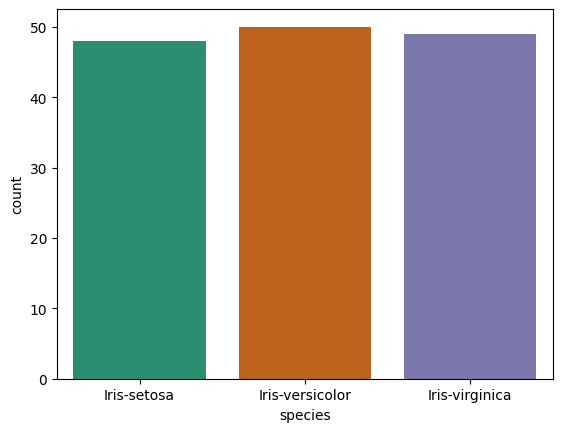

In [ ]:
sns.countplot(x = "species",data=df,palette="Dark2")

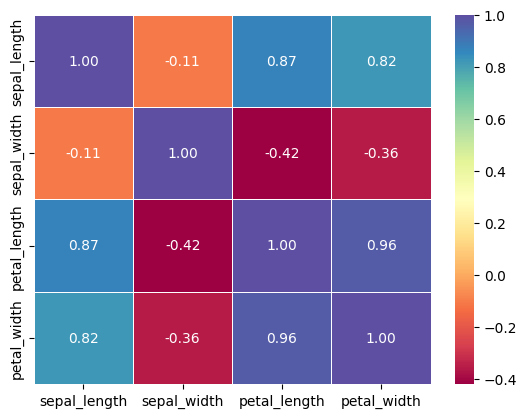

In [ ]:
fig,ax=plt.subplots()
sns.heatmap(df.drop(columns='species').corr(), annot=True,cmap='Spectral',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

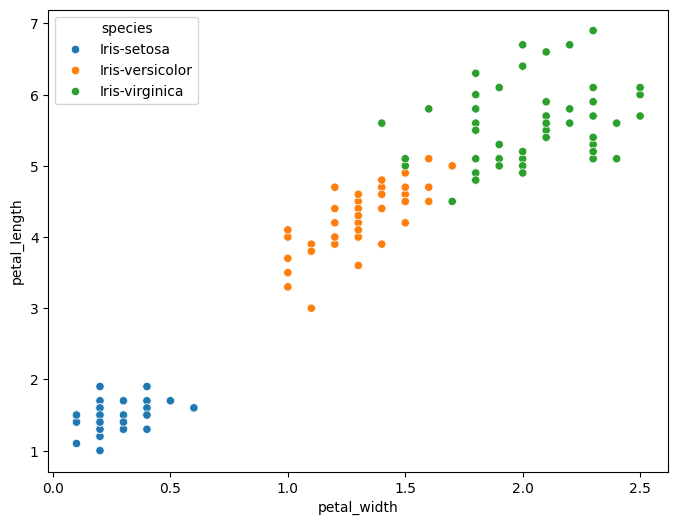

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=df)
plt.show()

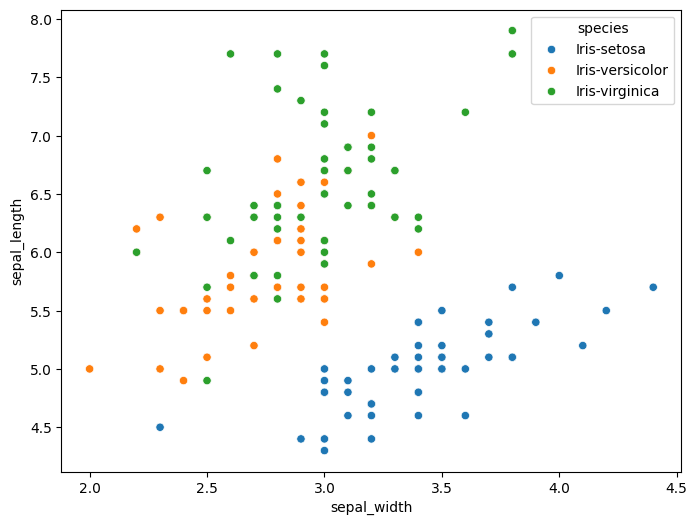

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=df)
plt.show()

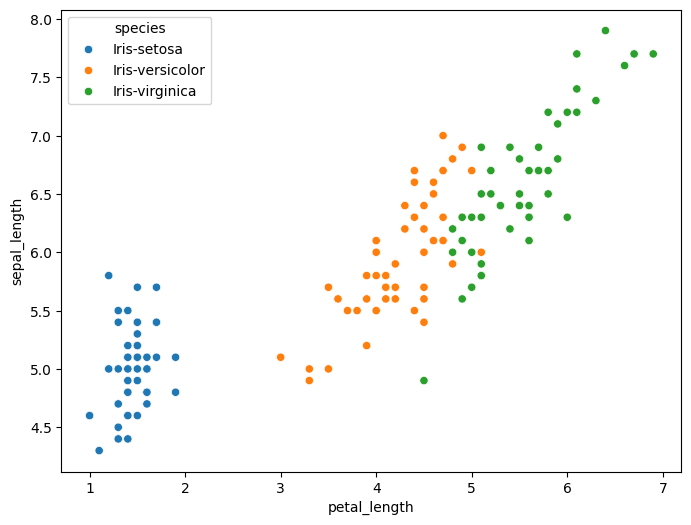

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=df)
plt.show()

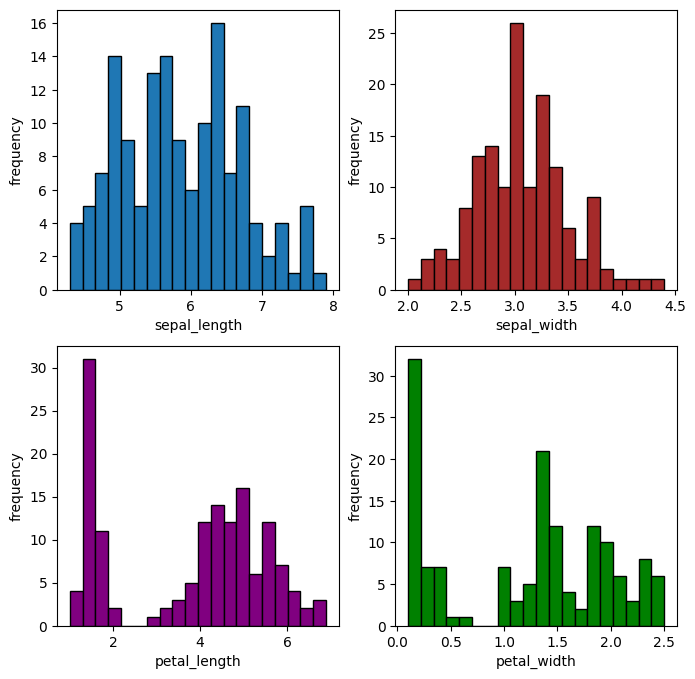

In [ ]:
fig,ax=plt.subplots(2,2, figsize=(8,8))

ax[0,0].hist(df['sepal_length'],bins=20,edgecolor='black')
ax[0,0].set_xlabel('sepal_length')
ax[0,0].set_ylabel('frequency')

ax[0,1].hist(df['sepal_width'],bins=20,edgecolor='black',color='brown')
ax[0,1].set_xlabel('sepal_width')
ax[0,1].set_ylabel('frequency')

ax[1,0].hist(df['petal_length'],bins=20,edgecolor='black',color='purple')
ax[1,0].set_xlabel('petal_length')
ax[1,0].set_ylabel('frequency')

ax[1,1].hist(df['petal_width'],bins=20,edgecolor='black',color='green')
ax[1,1].set_xlabel('petal_width')
ax[1,1].set_ylabel('frequency')
plt.show()

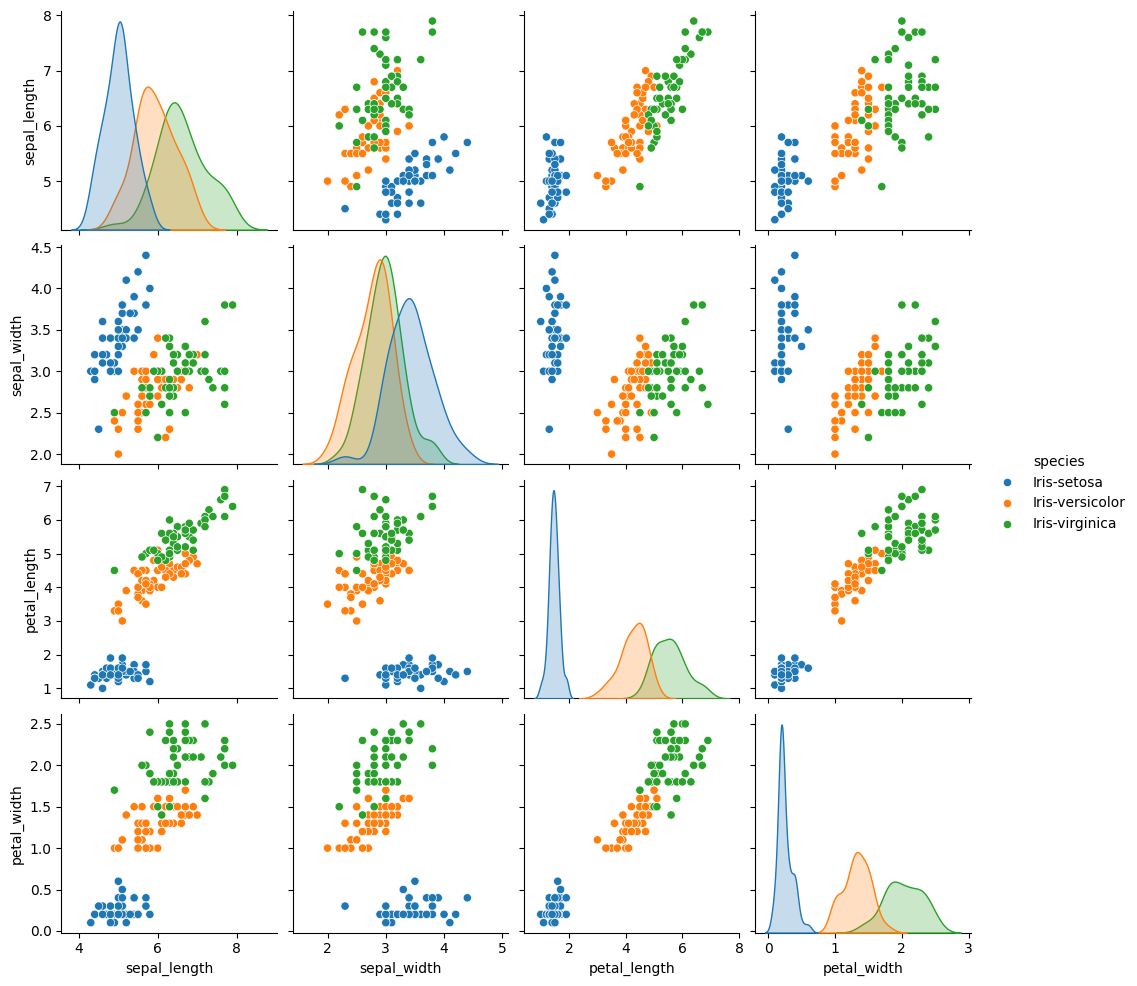

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df['species']=label_encoder.fit_transform(df['species'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
x= df.drop('species',axis=1)
y=df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
train_data= x_train.join(y_train)
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,1
32,5.2,4.1,1.5,0.1,0
11,4.8,3.4,1.6,0.2,0
133,6.3,2.8,5.1,1.5,2
148,6.2,3.4,5.4,2.3,2
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,2
52,6.9,3.1,4.9,1.5,1
59,5.2,2.7,3.9,1.4,1
68,6.2,2.2,4.5,1.5,1


In [ ]:
from sklearn.linear_model import LogisticRegression
fitted_model_lr = LogisticRegression()
fitted_model_lr.fit(x_train,y_train)
y_pred_lr = fitted_model_lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy for LR: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.89      0.89         9
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



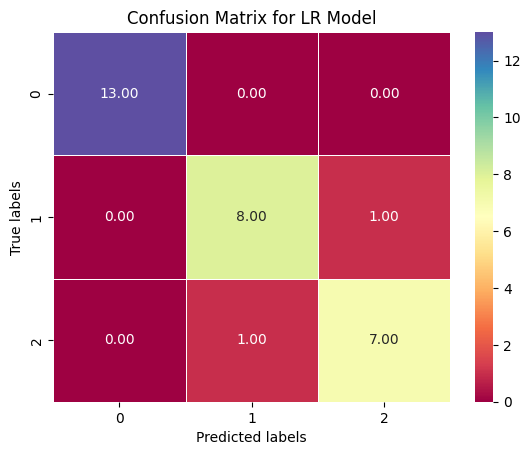

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_lr)
print(f' Accuracy for LR: {accuracy:.4f}')
print(classification_report(y_test, y_pred_lr))
cf=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
fitted_model_knn = KNeighborsClassifier()
fitted_model_knn.fit(x_train,y_train)
y_pred_knn = fitted_model_knn.predict(x_test)

 Accuracy for KNN: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



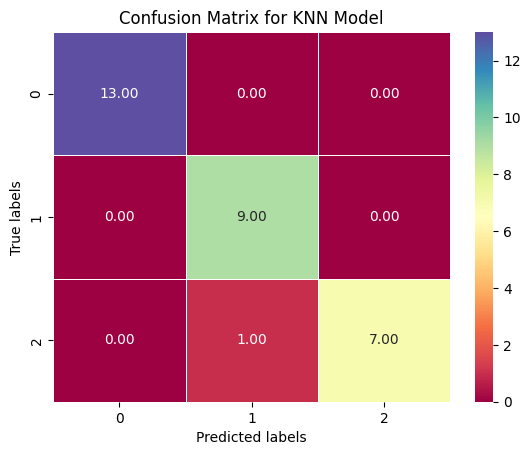

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred_knn)
print(f' Accuracy for KNN: {accuracy1:.4f}')
print(classification_report(y_test, y_pred_knn))
cf1=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf1,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
fitted_model_dt = DecisionTreeClassifier()
fitted_model_dt.fit(x_train,y_train)
y_pred_dt = fitted_model_dt.predict(x_test)

 Accuracy for DT: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.89      0.89         9
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



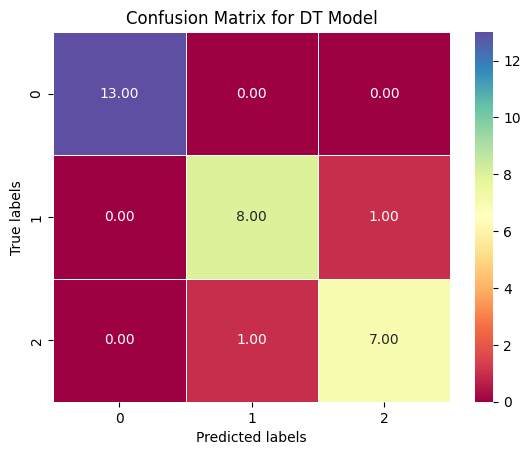

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred_dt)
print(f' Accuracy for DT: {accuracy2:.4f}')
print(classification_report(y_test, y_pred_dt))
cf3=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cf3,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for DT Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
fitted_model_rf = RandomForestClassifier()
fitted_model_rf.fit(x_train,y_train)
y_pred_rf = fitted_model_rf.predict(x_test)

 Accuracy for RF: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.89      0.89         9
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



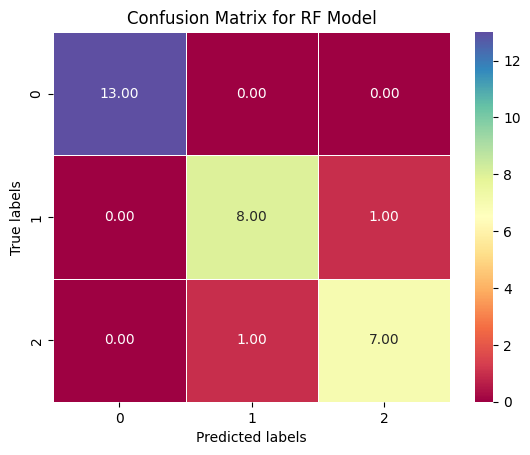

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred_rf)
print(f' Accuracy for RF: {accuracy3:.4f}')
print(classification_report(y_test, y_pred_rf))
cf4=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cf4,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for RF Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

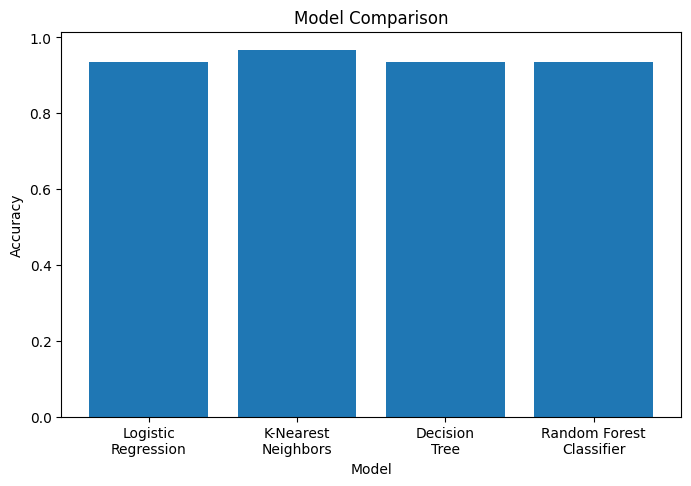

In [ ]:
model_names = list(["Logistic\nRegression", "K-Nearest\nNeighbors",  "Decision\nTree", "Random Forest\nClassifier"])
model_scores = list([accuracy,accuracy1,accuracy2,accuracy3])

fig,ax=plt.subplots(figsize=(8, 5))
ax.bar(model_names,model_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
plt.show()

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

data1={
    'sepal_length': [6.5],
    'sepal_width' : [2.8],
    'petal_length' : [5],
    'petal_width' : [2.2],
}
input_data = pd.DataFrame(data1)

# Predict the flower type for the input data
flower_type = fitted_model_knn.predict(input_data)[0]

# Map the output label to the flower name
flower_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
flower_name = flower_names[flower_type]

# Output the classification
print(f"\nFlower Classified as:{flower_name}")


Flower Classified as:Iris-virginica


In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

sepal_length = float(input("Enter Sepal Length (cm): "))
sepal_width = float(input("Enter Sepal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))

data1={
    'sepal_length': [sepal_length],
    'sepal_width': [sepal_width],
    'petal_length': [petal_length],
    'petal_width': [petal_width]
}
input_data = pd.DataFrame(data1)

# Predict the flower type for the input data
flower_type = fitted_model_knn.predict(input_data)[0]

# Map the output label to the flower name
flower_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
flower_name = flower_names[flower_type]

# Output the classification
print(f"\nFlower Classified as:{flower_name}")

Enter Sepal Length (cm): 6.5
Enter Sepal Width (cm): 2.8
Enter Petal Length (cm): 5
Enter Petal Width (cm): 2.2

Flower Classified as:Iris-virginica
